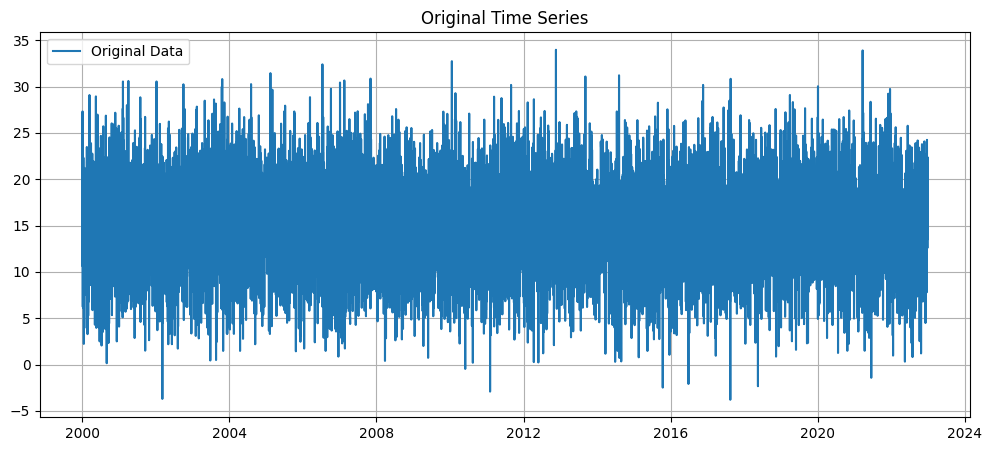

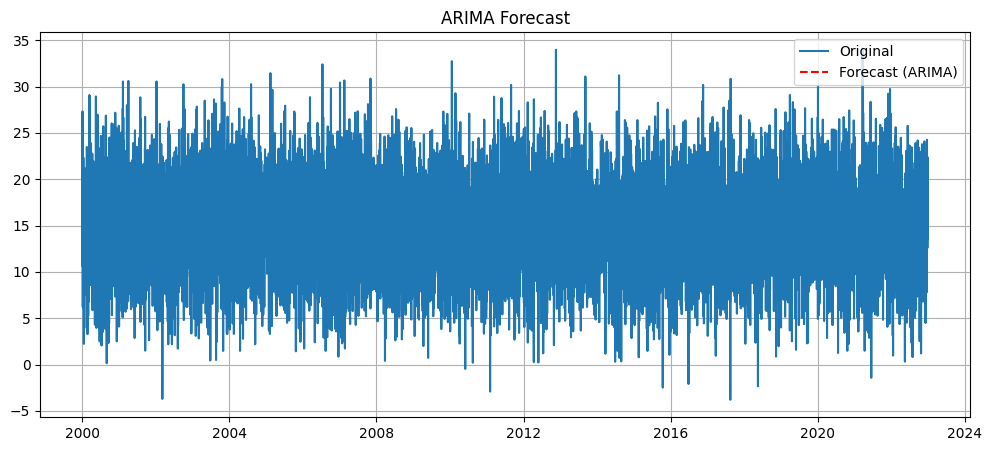

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the Dataset
file_path = '/content/climate_change_data.csv'  # Change path if needed
df = pd.read_csv(file_path)

# Step 3: Preprocess the Data
df.columns = [col.strip() for col in df.columns]
date_col = df.columns[0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df.set_index(date_col, inplace=True)

# Select numeric columns only
df_numeric = df.select_dtypes(include='number')
if df_numeric.empty:
    raise ValueError("No numeric columns found!")

# Use first numeric column
value_col = df_numeric.columns[0]
data = df_numeric[value_col].dropna()

# Optional: Plot original data
plt.figure(figsize=(12, 5))
plt.plot(data, label='Original Data')
plt.title('Original Time Series')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Fit ARIMA Model
# (p,d,q) values should ideally be determined via AIC or grid search; we use a sample here
model = ARIMA(data, order=(1, 1, 1))  # Change to (p,d,q) as needed
model_fit = model.fit()

# Step 5: Forecast Future Values
forecast_steps = 12  # Forecast next 12 periods
forecast = model_fit.forecast(steps=forecast_steps)

# Create index for forecast
last_date = data.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps+1, freq='M')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 6: Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(data, label='Original')
plt.plot(forecast_series, label='Forecast (ARIMA)', color='red', linestyle='--')
plt.title('ARIMA Forecast')
plt.grid(True)
plt.legend()
plt.show()
